In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np

from src.camera import Camera
from src.image_processing_pipeline import ImageProcessingPipeline

In [2]:
camera = Camera.create("camera_cal/calibration*.jpg")
camera.calibrate(load=True)

Text(0.5, 1.0, 'Undistorted Image')

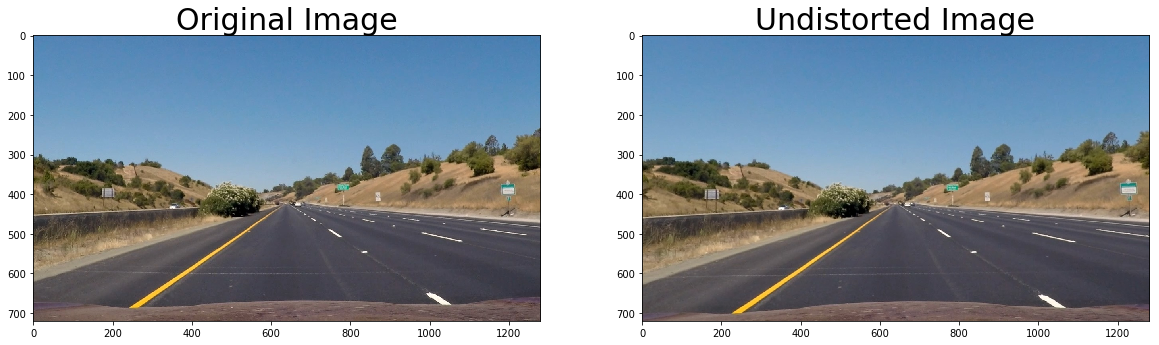

In [3]:
distorted_image = cv2.cvtColor(cv2.imread('test_images/straight_lines1.jpg'), cv2.COLOR_BGR2RGB)
undistorted_image = camera.undistort(distorted_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(distorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=30)

True

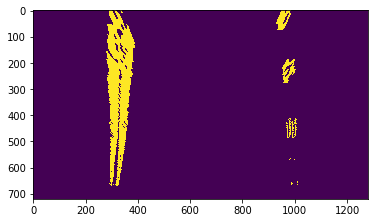

In [4]:
pipeline = ImageProcessingPipeline(camera)

processed = pipeline.process(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))

pipeline.sobel_thresh = (10, 120)
pipeline.sobel_kernel = 3
pipeline.mag_thresh = (20, 200)
pipeline.dir_thresh = (np.pi / 4, np.pi)
pipeline.color_thresh = (0, 255)

pipeline.yellow_lower = [15, 100, 0]
pipeline.yellow_upper = [50, 220, 255]

pipeline.white_lower = [0, 200, 0]
pipeline.white_upper = [255, 255, 255]

pipeline.lane_points = np.float32([[210,720],[595,450],[690,450], [1110, 720]])
pipeline.lane_dest_points = np.float32([[200, 720], [200, 0], [1000, 0], [1000, 720]])

thresholded_warped_image, undistorted = pipeline.process(distorted_image)
plt.imshow(thresholded_warped_image)
cv2.imwrite("./output_images/straight_lines1.jpg", pipeline._warp_image(distorted_image))

Text(0.5, 1.0, 'Undistorted Image')

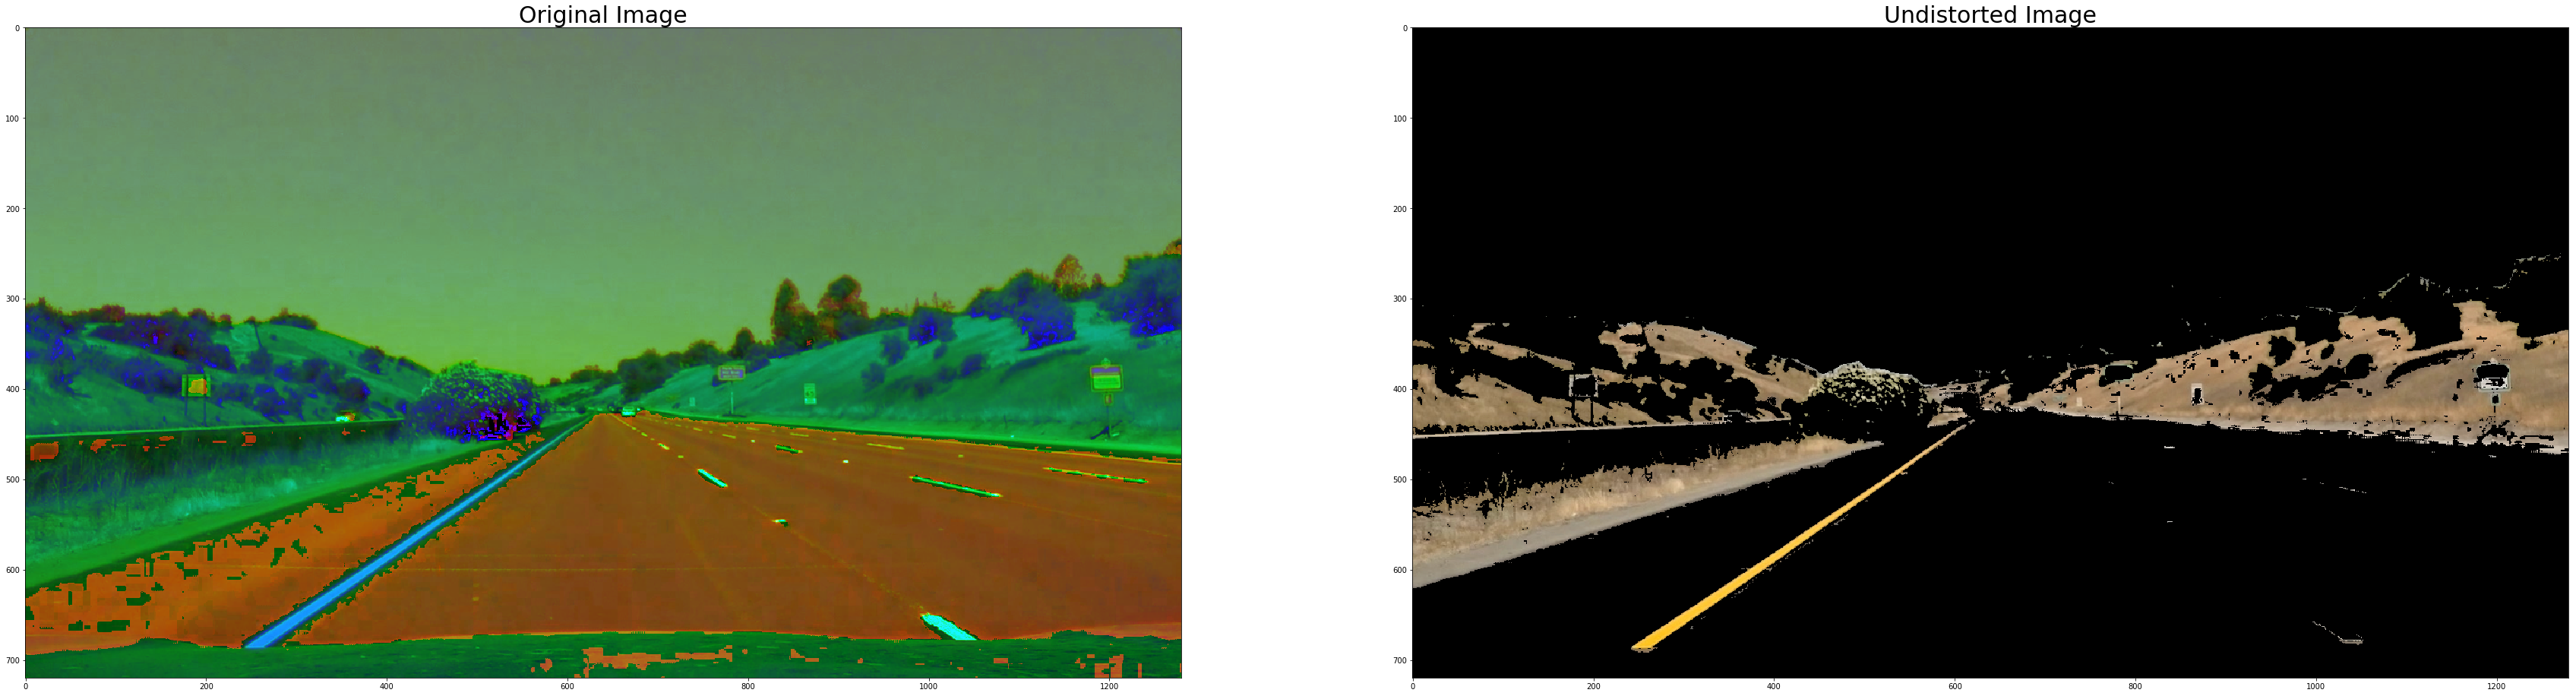

In [5]:
#plt.imshow(pipeline._color_pipeline(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB)))

image = cv2.cvtColor(distorted_image, cv2.COLOR_RGB2HLS)
out = cv2.inRange(image, np.array(pipeline.yellow_lower), np.array(pipeline.yellow_upper))
yellow = cv2.bitwise_and(image, image, mask=out)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(60,30))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(cv2.cvtColor(yellow, cv2.COLOR_HLS2RGB))
ax2.set_title('Undistorted Image', fontsize=30)

Text(0.5, 1.0, 'Undistorted Image')

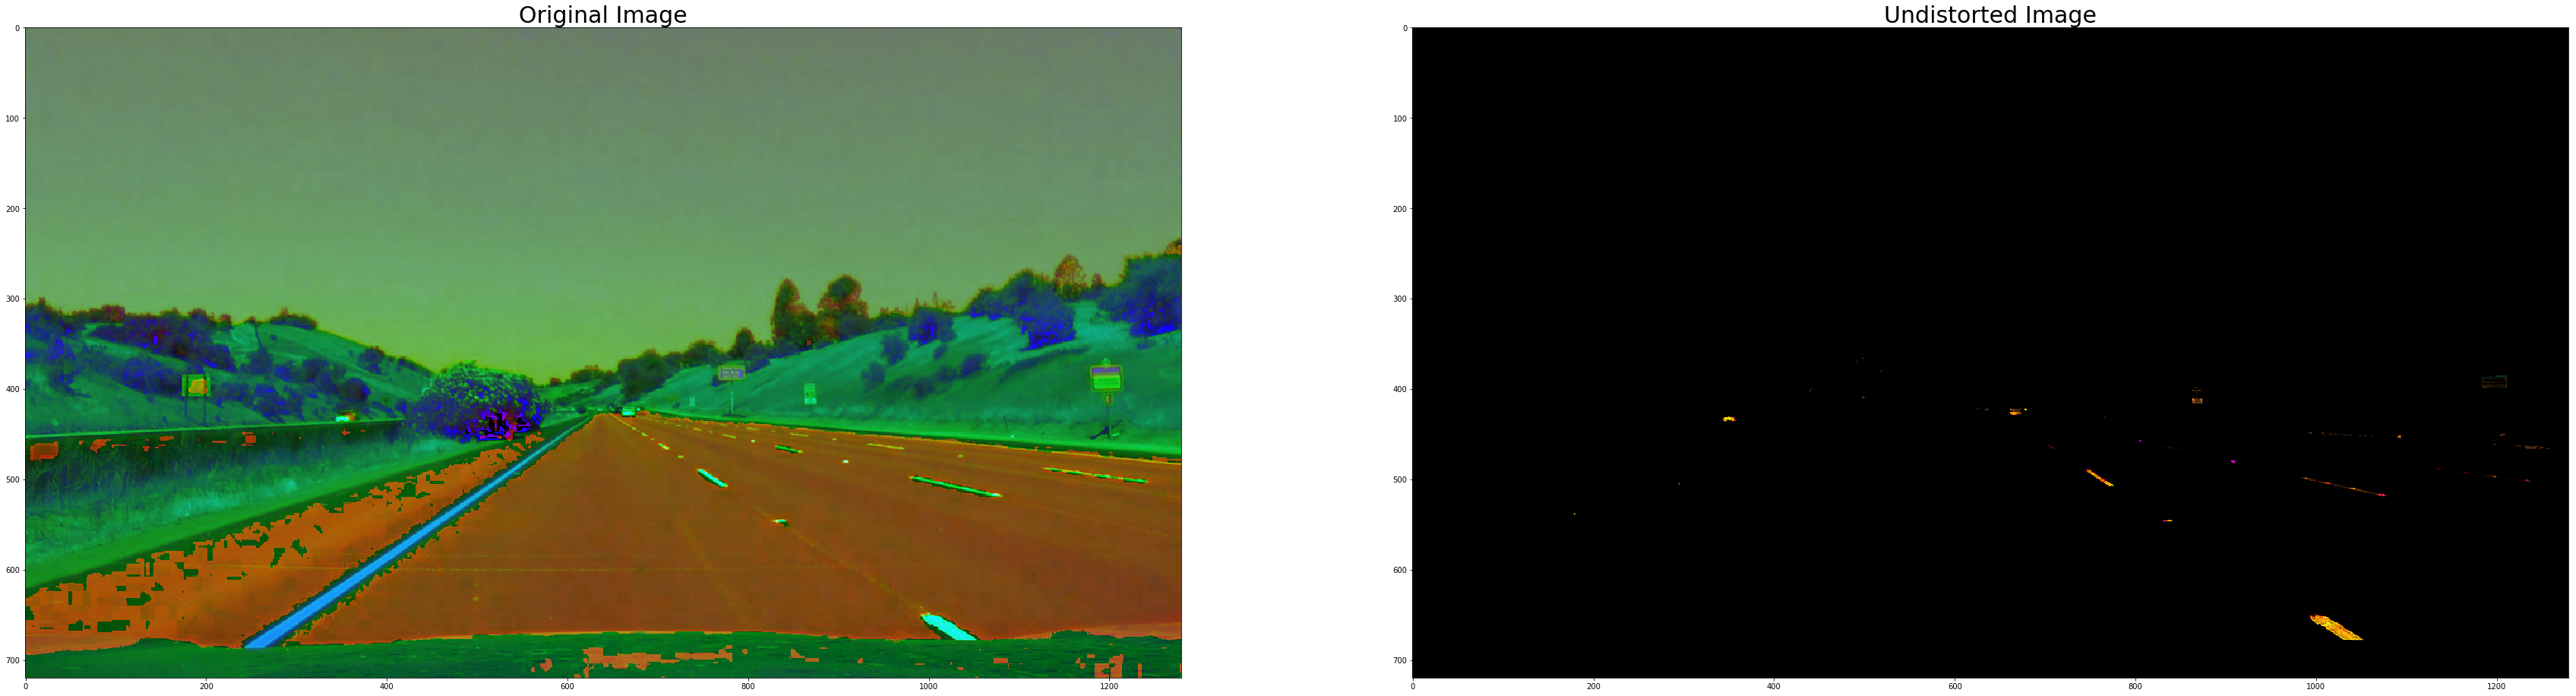

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(60,30))
out = cv2.inRange(image, np.array(pipeline.white_lower), np.array(pipeline.white_upper))
white = cv2.bitwise_and(image, image, mask=out)
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(cv2.cvtColor(white, cv2.COLOR_HSV2RGB))
ax2.set_title('Undistorted Image', fontsize=30)

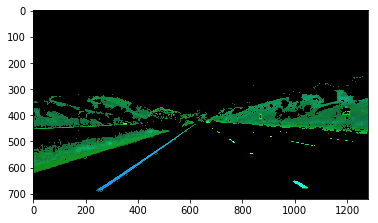

In [7]:
plt.imshow(cv2.bitwise_or(yellow, white))

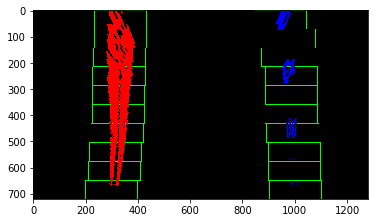

In [8]:
from src.road import Road

road = Road()

road.margin = 100
road.minpix = 50
road.n_windows = 10

plt.imshow(road.process(thresholded_warped_image))

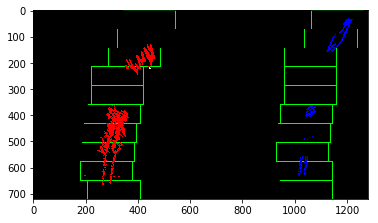

In [9]:
distorted_image2 = cv2.cvtColor(cv2.imread('test_images/test5.jpg'), cv2.COLOR_BGR2RGB)
thresholded_warped_image2, undistorted_2 = pipeline.process(distorted_image2)
plt.imshow(road.process(thresholded_warped_image2))

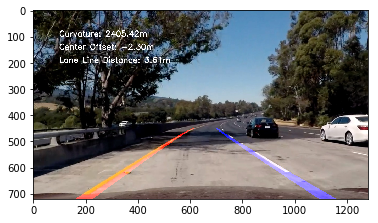

In [10]:
projected_lane = pipeline.project_lane(undistorted_2, thresholded_warped_image2, road.lane)
plt.imshow(projected_lane)

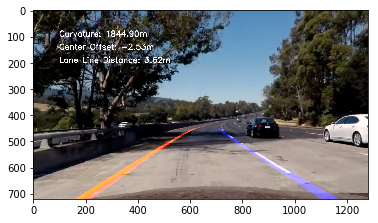

In [11]:
a, b = pipeline.process(undistorted_2)
p = road.process(a)
plt.imshow(pipeline.project_lane(b, a, road.lane))

In [12]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [13]:
def process_image(image):
    warped_image, undistorted = pipeline.process(image)
    lane_image = road.process(warped_image)
    return pipeline.project_lane(image, warped_image, road.lane)

In [26]:
white_output = 'output_movie/test_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False, threads=100, preset='ultrafast')

t:   0%|          | 2/1260 [00:00<01:13, 17.17it/s, now=None]

Moviepy - Building video output_movie/test_video.mp4.
Moviepy - Writing video output_movie/test_video.mp4



t:  15%|█▌        | 192/1260 [00:21<02:04,  8.58it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  15%|█▌        | 194/1260 [00:21<02:08,  8.29it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  25%|██▌       | 316/1260 [00:35<01:54,  8.28it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  25%|██▌       | 318/1260 [00:35<01:57,  7.98it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  25%|██▌       | 320/1260 [00:36<02:00,  7.83it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  26%|██▌       | 322/1260 [00:36<02:00,  7.76it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  26%|██▌       | 324/1260 [00:36<02:01,  7.72it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  26%|██▌       | 326/1260 [00:37<02:01,  7.71it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  26%|██▌       | 328/1260 [00:37<01:55,  8.10it/s, now=None]

Bad last line detection....doing sliding window check


t:  27%|██▋       | 336/1260 [00:38<01:52,  8.25it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  27%|██▋       | 338/1260 [00:38<01:54,  8.08it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  29%|██▉       | 367/1260 [00:41<01:50,  8.08it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  29%|██▉       | 369/1260 [00:42<01:50,  8.03it/s, now=None]

Bad last line detection....doing sliding window check


t:  30%|██▉       | 374/1260 [00:42<01:46,  8.30it/s, now=None]

Bad last line detection....doing sliding window check


t:  45%|████▍     | 563/1260 [01:04<01:18,  8.83it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  45%|████▍     | 565/1260 [01:04<01:19,  8.70it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  45%|████▌     | 567/1260 [01:04<01:19,  8.68it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  47%|████▋     | 594/1260 [01:07<01:15,  8.86it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  47%|████▋     | 596/1260 [01:08<01:16,  8.72it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  47%|████▋     | 598/1260 [01:08<01:15,  8.78it/s, now=None]

Bad last line detection....doing sliding window check


t:  48%|████▊     | 601/1260 [01:08<01:15,  8.76it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  48%|████▊     | 603/1260 [01:08<01:15,  8.70it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  50%|████▉     | 624/1260 [01:11<01:15,  8.43it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  50%|█████     | 630/1260 [01:11<01:15,  8.35it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  51%|█████     | 641/1260 [01:13<01:12,  8.55it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  80%|███████▉  | 1005/1260 [01:55<00:29,  8.57it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  80%|███████▉  | 1007/1260 [01:55<00:30,  8.24it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  80%|████████  | 1009/1260 [01:55<00:30,  8.22it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  80%|████████  | 1011/1260 [01:55<00:30,  8.24it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  80%|████████  | 1013/1260 [01:55<00:29,  8.24it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  81%|████████  | 1015/1260 [01:56<00:30,  7.96it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  81%|████████  | 1017/1260 [01:56<00:30,  8.01it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  81%|████████  | 1019/1260 [01:56<00:30,  8.02it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  81%|████████  | 1021/1260 [01:57<00:30,  7.82it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  81%|████████  | 1023/1260 [01:57<00:29,  7.99it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  81%|████████▏ | 1025/1260 [01:57<00:30,  7.76it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  82%|████████▏ | 1027/1260 [01:57<00:29,  7.88it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  82%|████████▏ | 1029/1260 [01:58<00:29,  7.89it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


t:  85%|████████▍ | 1065/1260 [02:02<00:22,  8.57it/s, now=None]

Bad last line detection....doing sliding window check
Bad last line detection....doing sliding window check


Moviepy - Done !
Moviepy - video ready output_movie/test_video.mp4
CPU times: user 7min 22s, sys: 31.5 s, total: 7min 53s
Wall time: 2min 25s


In [27]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [16]:
clip1.save_frame("./test_images/challenge.jpg", t=5)

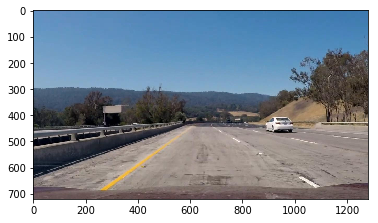

In [17]:
tricky = cv2.cvtColor(cv2.imread("./test_images/tricky.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(tricky)

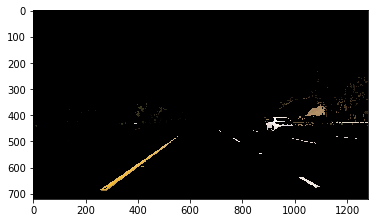

In [18]:
thresholded_warped_image, undistorted = pipeline.process(tricky)
plt.imshow(thresholded_warped_image)
plt.imshow(pipeline._color_pipeline(tricky))

Text(0.5, 1.0, 'Undistorted Image')

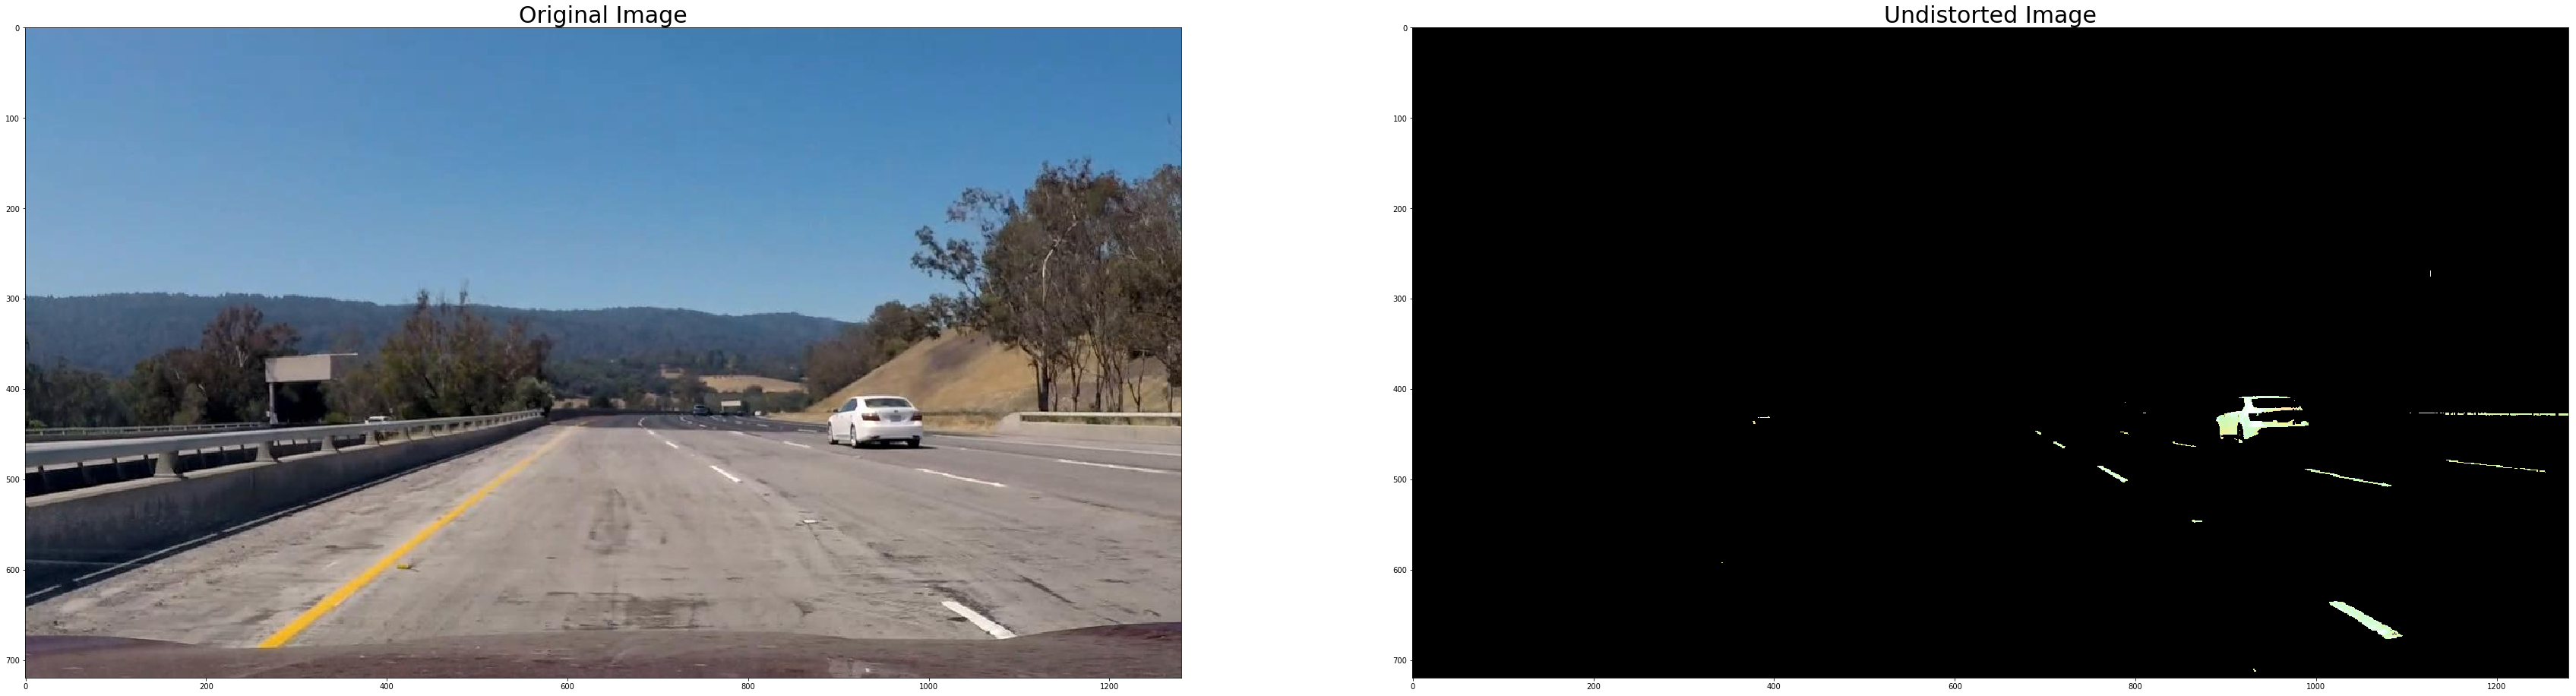

In [19]:
#plt.imshow(pipeline._color_pipeline(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB)))
hsv = cv2.cvtColor(tricky, cv2.COLOR_RGB2HLS)
out = cv2.inRange(hsv, np.array(pipeline.white_lower), np.array(pipeline.white_upper))
yellow = cv2.bitwise_and(tricky, tricky, mask=out)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(60,30))
ax1.imshow(tricky)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(cv2.cvtColor(yellow, cv2.COLOR_HLS2RGB))
ax2.set_title('Undistorted Image', fontsize=30)

In [20]:
tricky2 = cv2.cvtColor(cv2.imread('test_images/test5.jpg'), cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Undistorted Image')

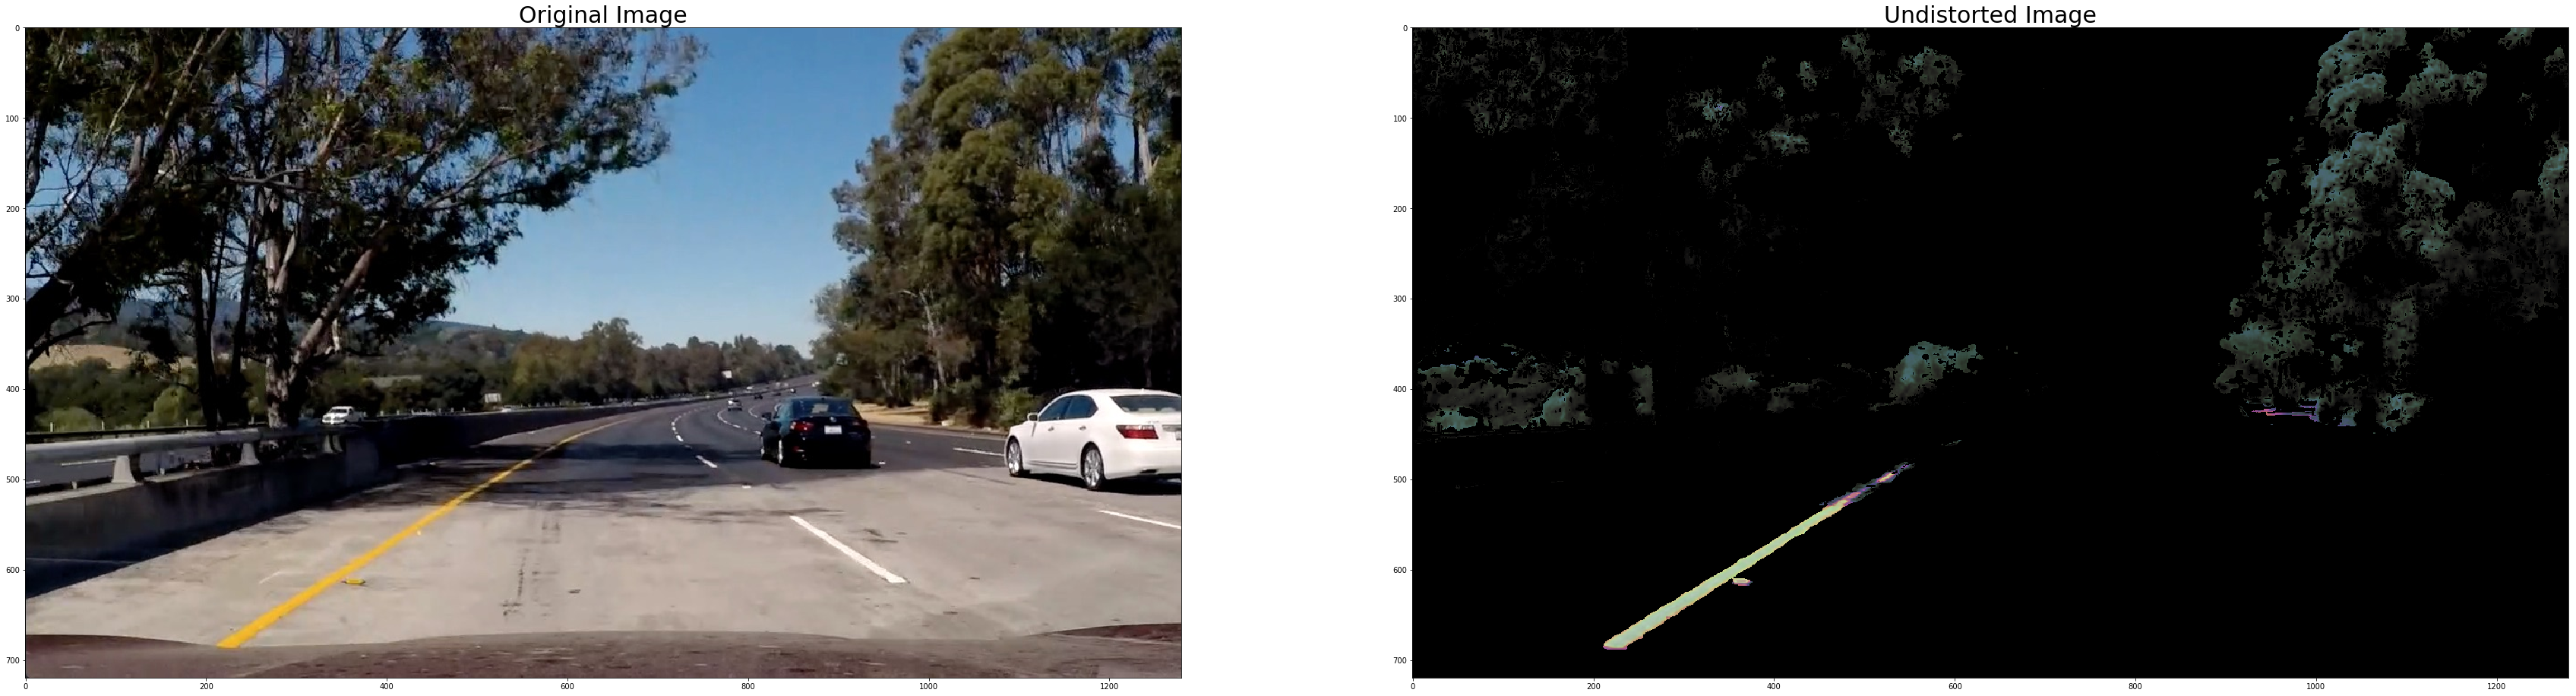

In [21]:
hsv = cv2.cvtColor(tricky2, cv2.COLOR_RGB2HSV)
out = cv2.inRange(hsv, np.array(pipeline.yellow_lower), np.array(pipeline.yellow_upper))
yellow = cv2.bitwise_and(tricky2, tricky2, mask=out)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(60,30))
ax1.imshow(tricky2)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(cv2.cvtColor(yellow, cv2.COLOR_HLS2RGB))
ax2.set_title('Undistorted Image', fontsize=30)

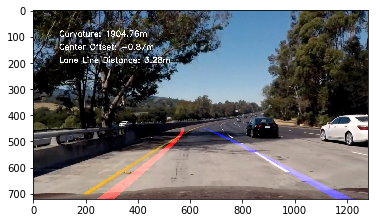

In [22]:
a, b = pipeline.process(tricky2)
plt.imshow(pipeline.project_lane(b, a, road.lane))

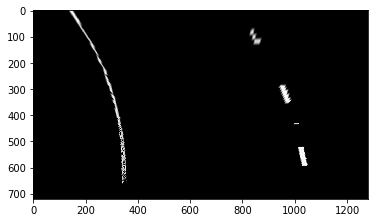

In [23]:
clip1.save_frame("./test_images/challenge.jpg", t=4.5)
challenge = cv2.cvtColor(cv2.imread("./test_images/challenge.jpg", 0), cv2.COLOR_BGR2RGB)
plt.imshow(pipeline._warp_image(pipeline._color_pipeline(challenge)))

In [24]:
a = [[1, 1, 1], [2, 3, 2], [3, 3, 3]]
np.mean(a, axis=0)

array([2.        , 2.33333333, 2.        ])

In [25]:
a = [1,2,3,4,5,6]
a[-5:]

[2, 3, 4, 5, 6]